In [89]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn

Define a Graph

In [85]:
g=dgl.graph(([0,1,1,1,2,2,3,3,3,4],[1,0,2,3,4,0,4,2,0,1]),num_nodes=6)

In [88]:
data_dict = {
    ('user', 'watches', 'movie'): (torch.tensor([0, 0, 1, 2]),
                                   torch.tensor([0, 1, 0, 1])),
    ('director', 'directs', 'movie'): (torch.tensor([0, 1]),
                                       torch.tensor([1, 0]))
}
h = dgl.heterograph(data_dict)
h

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

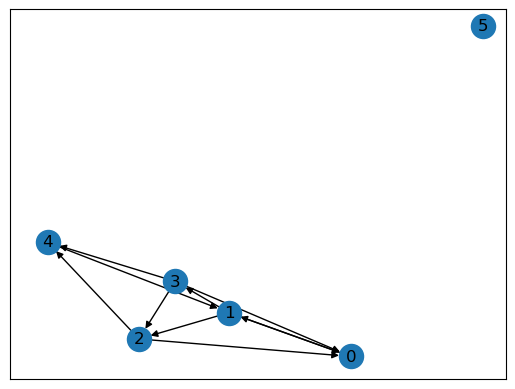

In [86]:
nx.draw_networkx(g.to_networkx(),with_labels=True)

In [5]:
g.ndata["l"]=torch.randn(6,3)

In [6]:
g.ndata["k"]=torch.randn(6,4)

In [7]:
g.edata["j"]=torch.randn(10,2)

In [8]:
g.edata["h"]=torch.randn(10,3)

Querying graph structure

In [9]:
g.number_of_nodes()

6

In [10]:
g.num_nodes()

6

In [97]:
h.num_nodes()

7

In [98]:
h.num_edges()

6

In [11]:
g.num_edges()

10

In [12]:
g.number_of_edges()

10

In [13]:
g.num_src_nodes()

6

In [14]:
g.number_of_src_nodes()

6

In [15]:
g.num_dst_nodes()

6

In [16]:
g.number_of_dst_nodes()

6

In [96]:
h.number_of_dst_nodes()

2

In [17]:
g.is_unibipartite

False

In [18]:
g.is_multigraph

False

In [95]:
h.is_multigraph

False

In [19]:
g.is_homogeneous

True

In [94]:
h.is_homogeneous

False

In [20]:
g.has_nodes([0])

tensor([True])

In [21]:
g.has_edges_between(0,1)

True

In [22]:
g.predecessors(0)

tensor([1, 2, 3])

In [23]:
g.successors(2)

tensor([4, 0])

In [24]:
g.edge_ids([0,1],[1,0])

tensor([0, 1])

In [25]:
g.find_edges(2)

(tensor([1]), tensor([2]))

In [26]:
g.in_edges(2)

(tensor([1, 3]), tensor([2, 2]))

In [27]:
g.out_edges(2)

(tensor([2, 2]), tensor([4, 0]))

In [28]:
g.in_degrees(4)

2

In [29]:
g.out_degrees(4)

1

Querying and manipulating node/edge ID type

In [30]:
g.idtype

torch.int64

In [31]:
g.long()

Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})

In [99]:
h.long()

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [32]:
g.int()

Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})

Using Node/edge features

In [33]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5])

In [34]:
g.ndata

{'l': tensor([[ 0.4320,  1.9488,  0.8323],
        [-0.4307,  1.5505,  1.0552],
        [ 0.7673, -0.6558, -1.0748],
        [ 0.1784, -1.4135,  0.5553],
        [ 1.7730, -0.6598, -0.3313],
        [-0.3722,  0.4978, -1.5325]]), 'k': tensor([[-0.1784, -0.0590,  0.2461,  0.8416],
        [-1.4550,  0.5805, -0.3638,  0.4080],
        [ 0.5238,  0.0410,  0.6481, -0.6090],
        [ 0.6358,  0.3608, -0.4695, -0.3372],
        [ 0.5359,  0.2182,  0.8525,  0.5636],
        [ 1.0150, -1.4665, -0.4008, -0.7468]])}

In [35]:
g.edges()

(tensor([0, 1, 1, 1, 2, 2, 3, 3, 3, 4]),
 tensor([1, 0, 2, 3, 4, 0, 4, 2, 0, 1]))

In [36]:
g.edata

{'j': tensor([[-0.6301,  1.3945],
        [ 0.3084, -0.1632],
        [-1.6833, -1.1285],
        [ 0.1159,  1.9243],
        [ 0.4462, -1.6991],
        [ 0.7464, -1.0168],
        [-0.0538,  1.2772],
        [ 0.1878,  1.0961],
        [-1.1355, -0.3287],
        [ 0.4656,  0.2239]]), 'h': tensor([[-0.8310, -0.2310, -0.3863],
        [-0.2237, -1.7738, -0.8649],
        [ 0.2552,  0.9006, -1.6798],
        [-0.1010, -0.8954, -0.5141],
        [-0.0515, -1.3893, -1.1087],
        [-0.8082,  0.6132,  0.6161],
        [ 1.4572,  0.4966,  0.2475],
        [ 0.4437,  1.2982,  0.6163],
        [ 0.2322, -0.4443,  0.6608],
        [ 0.4744, -0.3001,  0.7633]])}

In [37]:
g.node_attr_schemes

<bound method DGLGraph.node_attr_schemes of Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})>

In [103]:
h.ntypes

['director', 'movie', 'user']

In [104]:
h.node_attr_schemes(ntype="movie")

{}

In [38]:
g.edge_attr_schemes

<bound method DGLGraph.edge_attr_schemes of Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})>

In [105]:
h.etypes

['directs', 'watches']

In [106]:
h.edge_attr_schemes(etype="watches")

{}

In [39]:
g.srcnodes()

tensor([0, 1, 2, 3, 4, 5])

In [40]:
g.dstnodes()

tensor([0, 1, 2, 3, 4, 5])

In [41]:
g.srcdata

{'l': tensor([[ 0.4320,  1.9488,  0.8323],
        [-0.4307,  1.5505,  1.0552],
        [ 0.7673, -0.6558, -1.0748],
        [ 0.1784, -1.4135,  0.5553],
        [ 1.7730, -0.6598, -0.3313],
        [-0.3722,  0.4978, -1.5325]]), 'k': tensor([[-0.1784, -0.0590,  0.2461,  0.8416],
        [-1.4550,  0.5805, -0.3638,  0.4080],
        [ 0.5238,  0.0410,  0.6481, -0.6090],
        [ 0.6358,  0.3608, -0.4695, -0.3372],
        [ 0.5359,  0.2182,  0.8525,  0.5636],
        [ 1.0150, -1.4665, -0.4008, -0.7468]])}

In [42]:
g.dstdata

{'l': tensor([[ 0.4320,  1.9488,  0.8323],
        [-0.4307,  1.5505,  1.0552],
        [ 0.7673, -0.6558, -1.0748],
        [ 0.1784, -1.4135,  0.5553],
        [ 1.7730, -0.6598, -0.3313],
        [-0.3722,  0.4978, -1.5325]]), 'k': tensor([[-0.1784, -0.0590,  0.2461,  0.8416],
        [-1.4550,  0.5805, -0.3638,  0.4080],
        [ 0.5238,  0.0410,  0.6481, -0.6090],
        [ 0.6358,  0.3608, -0.4695, -0.3372],
        [ 0.5359,  0.2182,  0.8525,  0.5636],
        [ 1.0150, -1.4665, -0.4008, -0.7468]])}

Transforming graph

In [43]:
g1=g.subgraph([1,3,4])

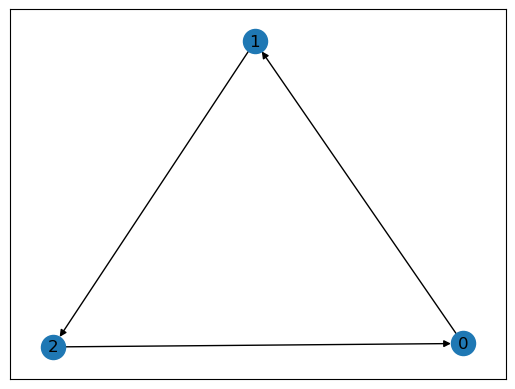

In [44]:
nx.draw_networkx(g1.to_networkx(),with_labels=True)

In [45]:
g2=g.edge_subgraph([2,3,4])

In [46]:
g.edges()

(tensor([0, 1, 1, 1, 2, 2, 3, 3, 3, 4]),
 tensor([1, 0, 2, 3, 4, 0, 4, 2, 0, 1]))

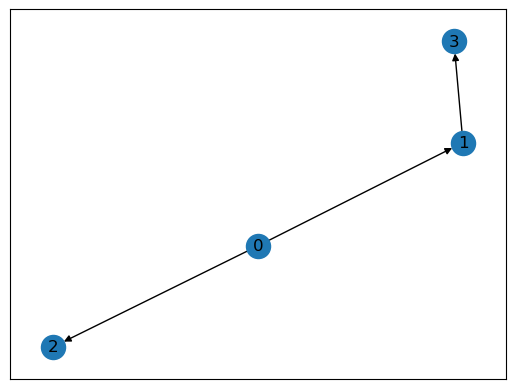

In [47]:
nx.draw_networkx(g2.to_networkx(),with_labels=True)

In [48]:
g1.node_type_subgraph(g1.ntypes,output_device=None)

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [107]:
h.node_type_subgraph(h.ntypes,output_device=None)

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])

In [49]:
g2.edge_type_subgraph(g2.etypes,output_device=None)

Graph(num_nodes=4, num_edges=3,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [50]:
g1.__getitem__

<bound method DGLGraph.__getitem__ of Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})>

In [108]:
h.__getitem__

<bound method DGLGraph.__getitem__ of Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])>

In [51]:
g1.line_graph()

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={}
      edata_schemes={})

In [52]:
newg = dgl.add_reverse_edges(g)
print(newg.edges())

(tensor([0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 1, 0, 2, 3, 4, 0, 4, 2, 0, 1]), tensor([1, 0, 2, 3, 4, 0, 4, 2, 0, 1, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4]))


In [53]:
g.edges()

(tensor([0, 1, 1, 1, 2, 2, 3, 3, 3, 4]),
 tensor([1, 0, 2, 3, 4, 0, 4, 2, 0, 1]))

In [54]:
g3=g1.add_self_loop(edge_feat_names=None)

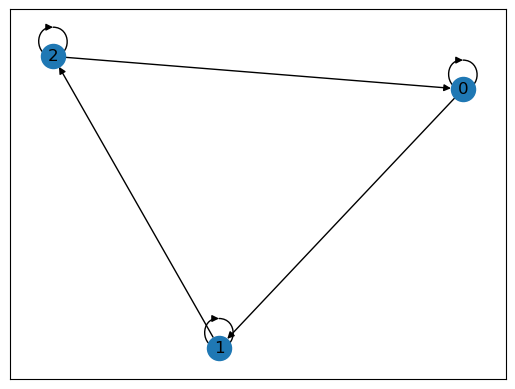

In [55]:
nx.draw_networkx(g3.to_networkx(),with_labels=True)

In [56]:
g4=g1.remove_self_loop()

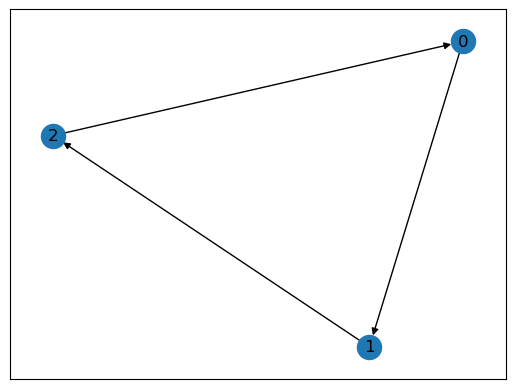

In [57]:
nx.draw_networkx(g4.to_networkx(),with_labels=True)

In [58]:
g1.to_simple()

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'count': Scheme(shape=(), dtype=torch.int64)})

Subgraph Extraction Ops

In [59]:
dgl.node_subgraph(g,[0,1,2])

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

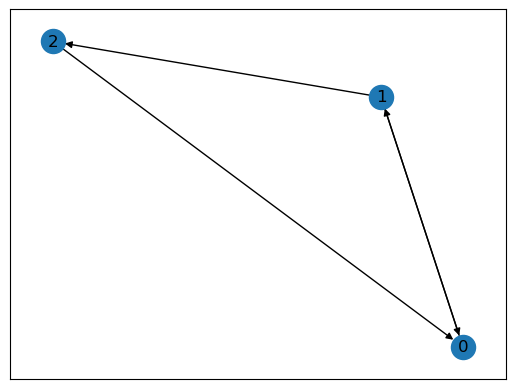

In [109]:
nx.draw_networkx(dgl.node_subgraph(g,[0,1,2]).to_networkx(),with_labels=True)

In [60]:
dgl.edge_subgraph(g,[1,2])

Graph(num_nodes=3, num_edges=2,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [61]:
dgl.node_type_subgraph(g, g.ntypes, output_device=None)

Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})

In [62]:
dgl.edge_type_subgraph(g,g.etypes,output_device=None)

Graph(num_nodes=6, num_edges=10,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32)})

In [63]:
dgl.in_subgraph(g,[0,1])

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

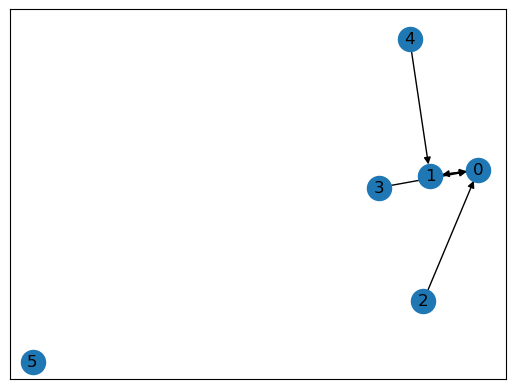

In [64]:
nx.draw_networkx(dgl.in_subgraph(g,[0,1]).to_networkx(),with_labels=True)

In [65]:
dgl.out_subgraph(g,[0,1])

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

<class 'dgl.heterograph.DGLGraph'>


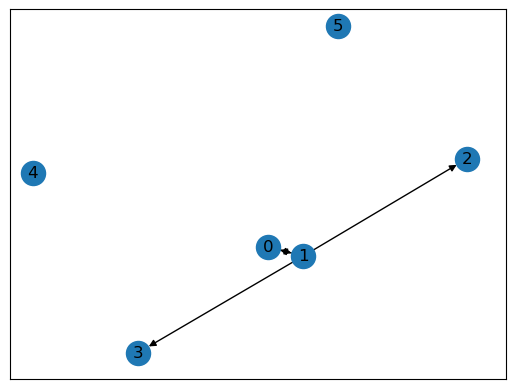

In [66]:
nx.draw_networkx(dgl.out_subgraph(g,[0,1]).to_networkx(),with_labels=True)
print(type(dgl.out_subgraph(g,[0,1])))

In [67]:
dgl.khop_in_subgraph(g,[0,1],2)


(Graph(num_nodes=5, num_edges=10,
       ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}),
 tensor([0, 1]))

In [68]:
dgl.khop_out_subgraph(g,[0,1],2)

(Graph(num_nodes=5, num_edges=10,
       ndata_schemes={'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}),
 tensor([0, 1]))

save and load 

In [69]:
dgl.save_graphs("graphs.dgl", [g, g1, g2,h])

In [76]:
(g, g1, g2,h),_ = dgl.load_graphs("graphs.dgl")

In [71]:
print(g1)

Graph(num_nodes=3, num_edges=3,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'l': Scheme(shape=(3,), dtype=torch.float32), 'k': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'j': Scheme(shape=(2,), dtype=torch.float32), 'h': Scheme(shape=(3,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})


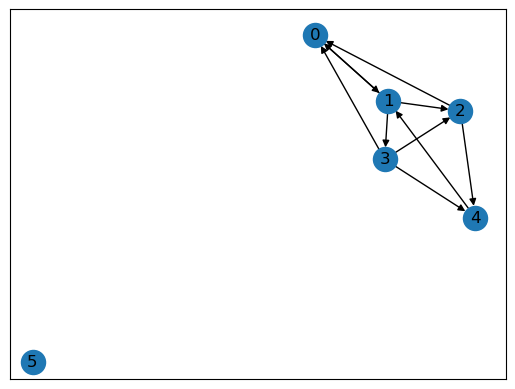

In [74]:
nx.draw_networkx(g.to_networkx(),with_labels=True)

In [110]:
print(h)

Graph(num_nodes={'director': 2, 'movie': 2, 'user': 3},
      num_edges={('director', 'directs', 'movie'): 2, ('user', 'watches', 'movie'): 4},
      metagraph=[('director', 'movie', 'directs'), ('user', 'movie', 'watches')])
